## import

In [1]:
import WGS
import numpy as np
import scipy as sp
import torch.fft as fft
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from SLMGeneration import SLM_class
import json
import torch
from BlinkSLM import BlinkSLM
import avt
import IMGpy
import slmpy

# blinkslm=BlinkSLM()
# with open("./SLM_config.json") as f:
#     config = json.load(f)
#     array_size = np.flip(np.array(config["arraysize"]))


Focal pixelpitch: [4.9921875, 4.9921875]
The input gaussian light beam waist: 8450um
Please note: you have used mask with radius 5000um
The init gaussian phase is random generated.


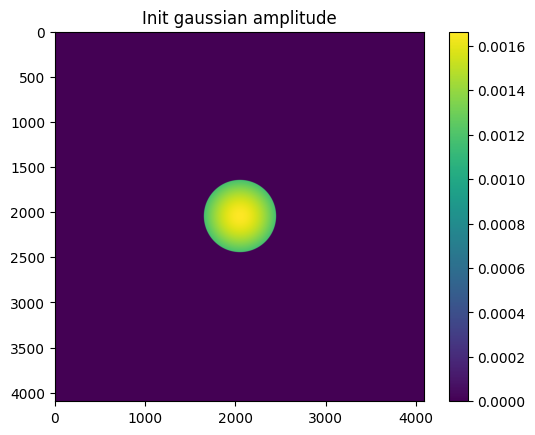

In [2]:
SLM = SLM_class()

SLM.image_init(initGaussianPhase_user_defined = None, initGaussianPhase_save = False, Plot = True)
initSLMAmp=SLM.initGaussianAmp
# initSLMAmp=torch.from_numpy(initSLMAmp).float()  # 如果需要的话，可以改为 .double()
# initSLMPhase=np.random.rand(initSLMAmp.ImgResX, initSLMAmp.ImgResY)*2*np.pi-np.pi
plt.show()


focal pixelpitch: [4.9921875, 4.9921875]
array spacing: [250, 250]
spacing pixels: [50, 50]
arraysize: [11 11]


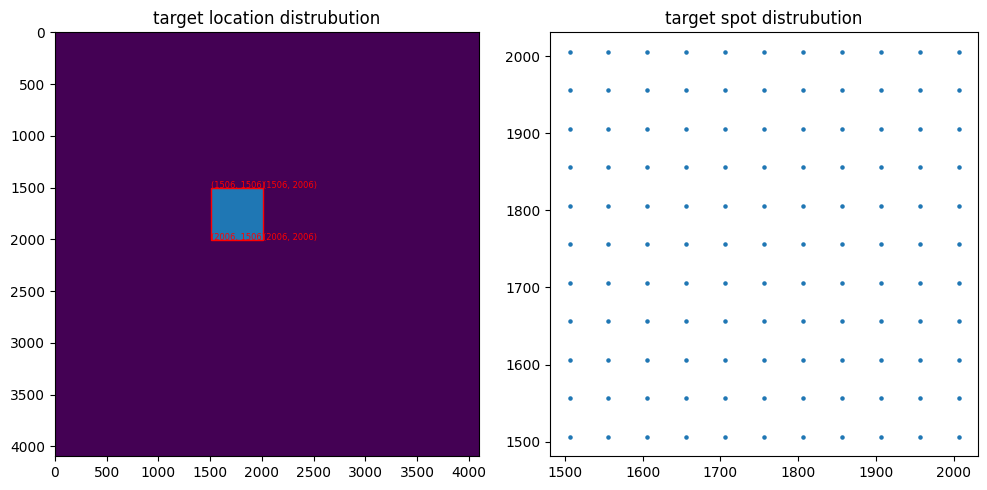

You have generated the target with 300um distance relative to the center.


In [3]:
Lattice_type="Rec"

gen_size = np.array([11,11])
array_size = np.flip(gen_size)
targetAmp=SLM.target_generate(Lattice_type, arraysize=gen_size,  Plot = True, distance=300)

#targetAmp[np.nonzero(targetAmp)[0][0],np.nonzero(targetAmp)[1][0]] = 0
# gen_size = np.array([15,13])
# array_size = np.flip(gen_size)
# targetAmp=SLM.target_generate(Lattice_type, distance=(20, -6*7.5), arraysize=gen_size,  Plot = True)

# gen_size = np.array([8,10])
# array_size = np.flip(gen_size)
# targetAmp=SLM.target_generate(Lattice_type, distance=(20+7*7.5, 0), arraysize=gen_size,  Plot = True)
# test modify targetAmp
# print(targetAmp[1544, 1238])
# targetAmp[1793, 1623]=0
# targetAmp[2303, 1776]=0

# targetAmp_array=np.nonzero(targetAmp)
# print(f"targetAmp:{targetAmp}, nozero{targetAmp_array}")
# print(targetAmp[targetAmp_array])

# # first_row=targetAmp_array[0][0]
# # first_col=targetAmp_array[1][0]
# # targetAmp[first_row,first_col]=0

# # targetAmp=torch.from_numpy(targetAmp).float()

# ## 1544, 1646
# tmp = targetAmp.copy()
# tmp[100:200, 400:500]=1
# print(np.nonzero(targetAmp), np.where(targetAmp))
# plt.figure()
# plt.imshow(tmp)
# print("test where:", np.nonzero([[1, 0, 0, 1], [0,0, 0,0],[0,1, 0, 0]]))

# # only valid for rec lattice.
# point = np.where(targetAmp)
# startRow = point[0][0]
# endRow = point[0][-1]
# startCol = point[1][0]
# endCol = point[1][-1]
# vertices = [[startRow,startCol], [startRow,endCol], [endRow,endCol], [endRow,startCol]]
# tmp = np.zeros_like(targetAmp)
# tmp[startRow:endRow, startCol:endCol]=1
# plt.figure()
# plt.imshow(tmp)


## init phase

C:\Users\Sneez\AppData\Local\Temp\ipykernel_37636\2815704555.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(targetAmp), Loop=20, threshold=0.005, Plot=True)


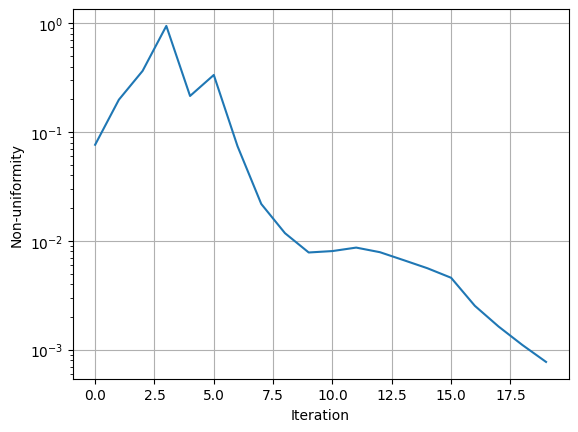

In [4]:
# 调用 WGS_phase_generate 函数
input_shape = (4096, 4096)  # 输入振幅分布的尺寸

RandomPhase = torch.rand(input_shape, dtype=torch.float32) * 2 * np.pi - np.pi

SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(targetAmp), Loop=20, threshold=0.005, Plot=True)
SLM_screen=SLM.phase_to_screen(SLM_Phase.cpu().clone().numpy())


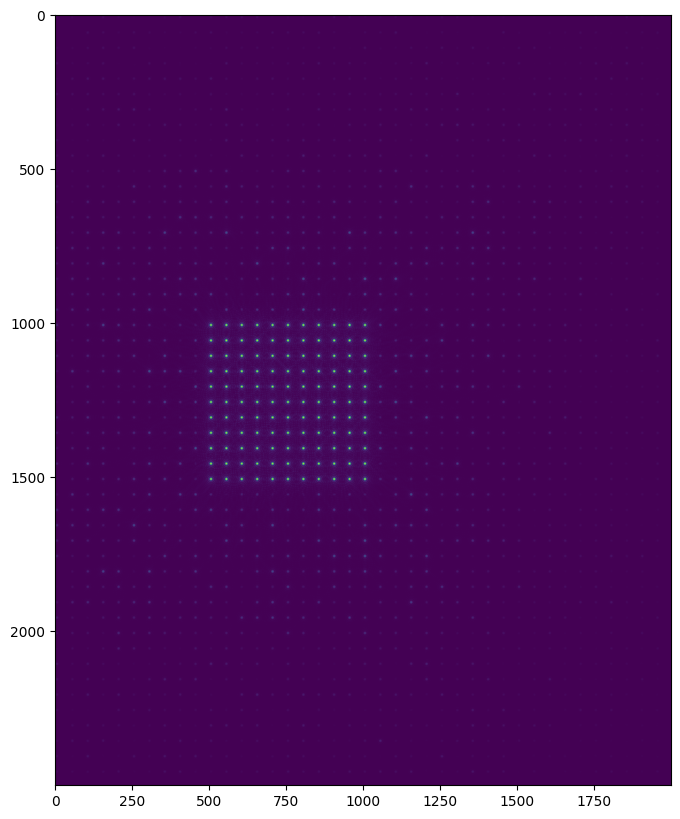

In [5]:
SLM_screen=SLM.phase_to_screen(SLM_Phase.cpu().clone().numpy())
fftAmp,fftPhase = SLM.phase_to_fftField(SLM_Phase.cpu())
plt.figure(figsize=(10,10))
plt.imshow(fftAmp[500:3000,1000:3000])
plt.show()
# blinkslm.slm_lib.Delete_SDK()

## write init phase to slm

In [ ]:
slm = slmpy.SLMdisplay(monitor=0,isImageLock = True)
tophat_screen_Corrected=IMGpy.SLM_screen_Correct(SLM_screen)


slm.updateArray(tophat_screen_Corrected)





Exception in thread Thread-4:
Traceback (most recent call last):
  File "C:\Users\Sneez\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "c:\Users\Sneez\Desktop\Computer Science\Quantum Computing\SLM\slmpy.py", line 142, in run
    frame = SLMframe(monitor = self.parent.monitor, isImageLock = self.parent.isImageLock)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sneez\Desktop\Computer Science\Quantum Computing\SLM\slmpy.py", line 37, in __init__
    self.SetMonitor(monitor)
  File "c:\Users\Sneez\Desktop\Computer Science\Quantum Computing\SLM\slmpy.py", line 70, in SetMonitor
    raise ValueError('Invalid monitor (monitor %d).' % monitor)
ValueError: Invalid monitor (monitor 1).


## 进行均匀性优化，读取IDS

In [13]:

from pymba import vimba
import cv2
import numpy as np
import matplotlib
import copy
import matplotlib.pyplot as plt

# print(IDS_Camera.m_device.RemoteDevice().NodeMaps()[IDS_Camera.selected_device])


ModuleNotFoundError: No module named 'cv2'

In [12]:
def non_uniformity_show(non_uniformity):
    non_uniformity = np.array(non_uniformity)
    min_index = np.argmin(non_uniformity)
    min_value = np.min(non_uniformity)
    min_index=0
    plt.plot(non_uniformity)
    plt.plot(min_index,min_value,'.')
    plt.annotate(f'Minimum: {min_value:.3f}', xy=(min_index, min_value),
                xytext=(min_index + 1, min_value),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    plt.title('Tweezer Uniformity Optimization')
    plt.xlabel('Number of iterations')
    plt.ylabel('Non uniformity')
    plt.show()
    

# 适用于4f系统优化
def camera_intensity_array_generate(intensity):
    intensity = np.array(intensity)
    intensity_2d_array = intensity.reshape(9,11)
    intensity_flip = np.transpose(intensity_2d_array)
    intensity_flip = np.flip(intensity_flip, axis=1)
    camera_intensity_array = intensity_flip.flatten()

    return camera_intensity_array

In [ ]:
import plotly.express as px

(4992, 4992)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
index = 0
non_uniformity = []
intensity_data = []
targetAmp_data = []
optimize = True
time_interval = 1
rep = 7



255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
0.061256782547998434


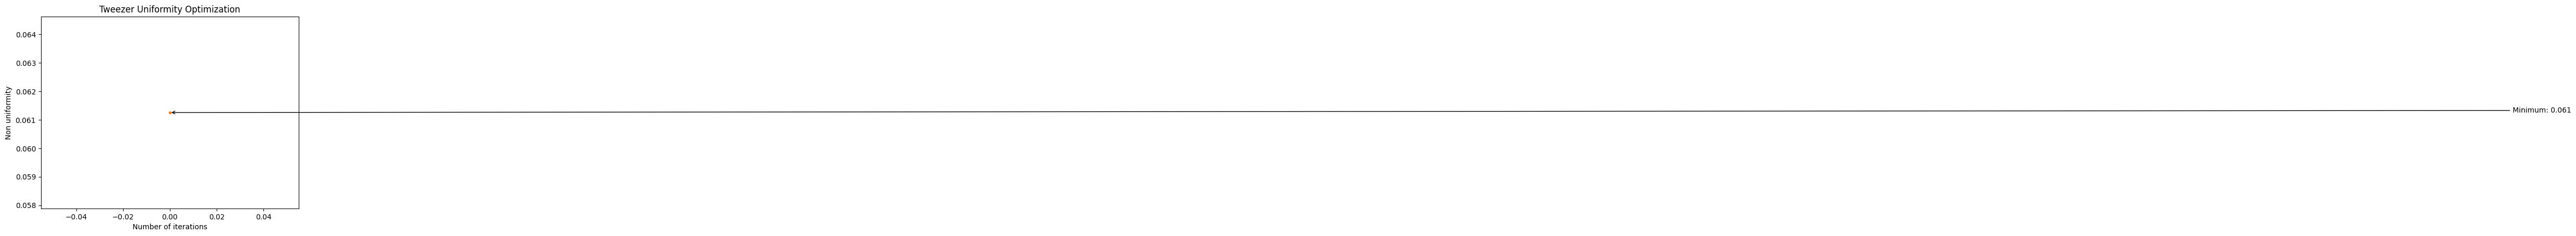

(array([1., 0., 0., 0., 1., 1., 1., 1., 1., 2., 3., 1., 2., 2., 0., 2., 1.,
        1., 0., 5.]),
 array([ 89862.,  91076.,  92290.,  93504.,  94718.,  95932.,  97146.,
         98360.,  99574., 100788., 102002., 103216., 104430., 105644.,
        106858., 108072., 109286., 110500., 111714., 112928., 114142.]),
 <BarContainer object of 20 artists>)

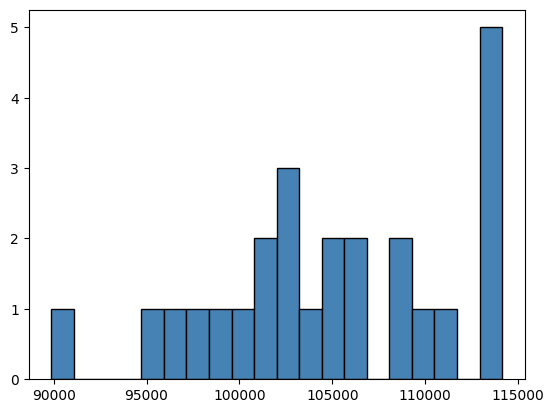

In [25]:
intensity = []
image_ROI = []
for i  in range(len(x1)):
        cur_roi = rotated_image_45[x1[i]:x2[i],y1[i]:y2[i]]
        image_ROI.append(cur_roi)
        print(cur_roi.max())
        # popt, pcov, fitted_image = gaussian_2d_fit(image_ROI[i], show=False)
        # intensity.append(popt[0])
        intensity.append(cur_roi.sum())



intensity = np.array(intensity)
camera_intensity = np.flip(intensity)
# camera_intensity=np.flip(camera_intensity)
intensity_data.append(camera_intensity)
non_uniformity.append(camera_intensity.std()/camera_intensity.mean())
print(camera_intensity.std()/camera_intensity.mean())
non_uniformity_show(non_uniformity)

plt.hist(x = intensity, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )


In [19]:
np.save('SLM_img2.npy', SLM_screen)

DEV_1AB22C040DE1
[]
0.062181939909832507


1
[ 88627 101223  97067 103866 108352  94611 101330  96095 103123 107180
 100288  98444  99631 105318 111465  93365 109650 102270 111739 112833
 104540 100152 107435 111992 112124]
[0.21593132 0.20205009 0.20633022 0.19946282 0.19529008 0.20899112
 0.20194339 0.20737111 0.20018009 0.19635492 0.20298978 0.20488211
 0.20365797 0.19808307 0.19254374 0.21038104 0.19413075 0.20101318
 0.19230752 0.19137297 0.19881878 0.20312755 0.19612175 0.19209018
 0.19197707]
[297.702872   318.1556223  311.5557735  322.28248479 329.16864978
 307.58901151 318.32373458 309.99193538 321.12770046 327.38356709
 316.68280661 313.75786843 315.64378657 324.52734862 333.86374466
 305.55686868 331.1344138  319.79681049 334.27383984 335.90623692
 323.32646041 316.46800786 327.77278716 334.65205811 334.8492198 ]
[64.28337266 64.28337266 64.28337266 64.28337266 64.28337266 64.28337266
 64.28337266 64.28337266 64.28337266 64.28337266 64.28337266 64.28337266
 64.28337266 64.28

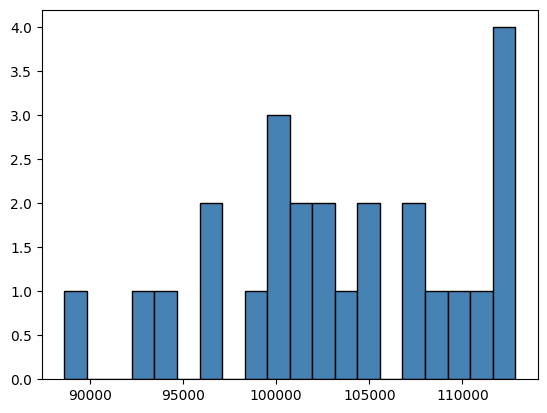

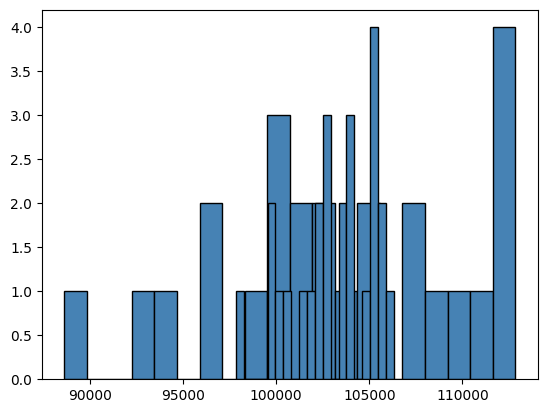

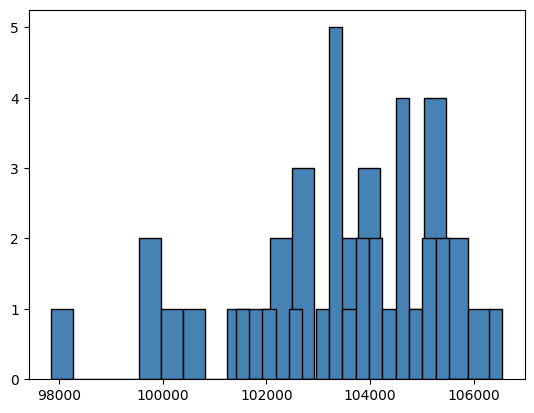

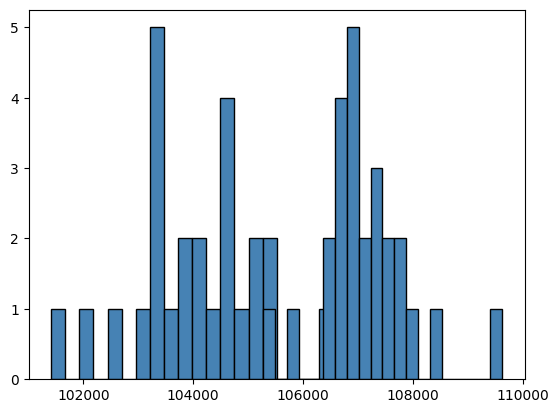

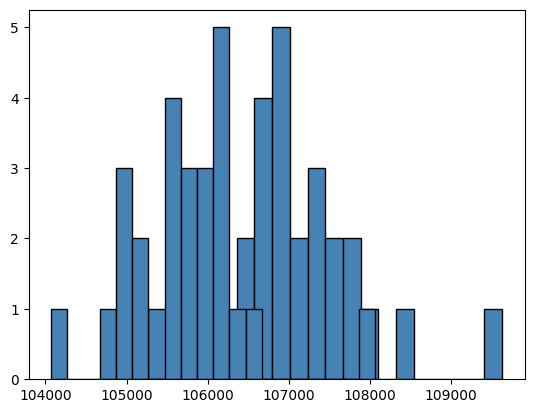

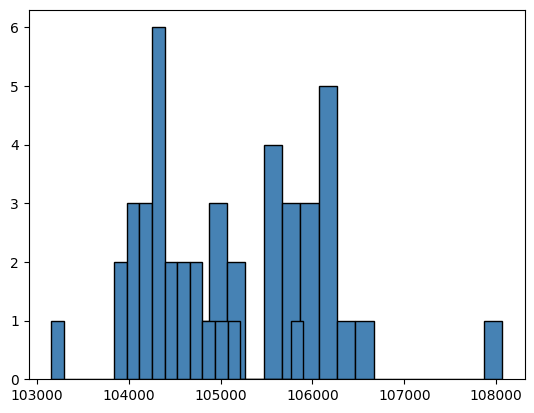

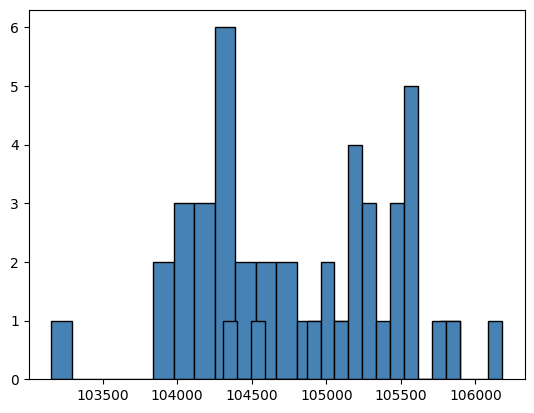

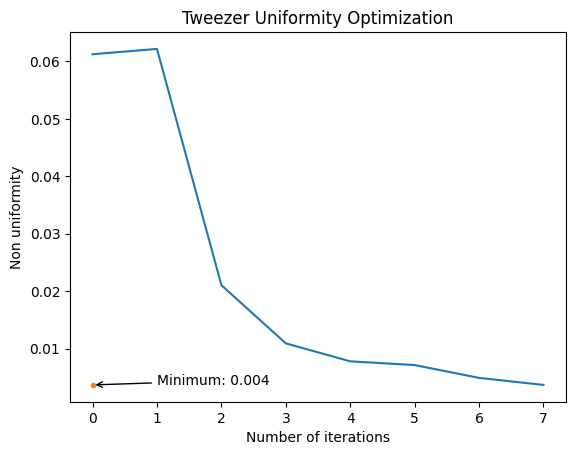

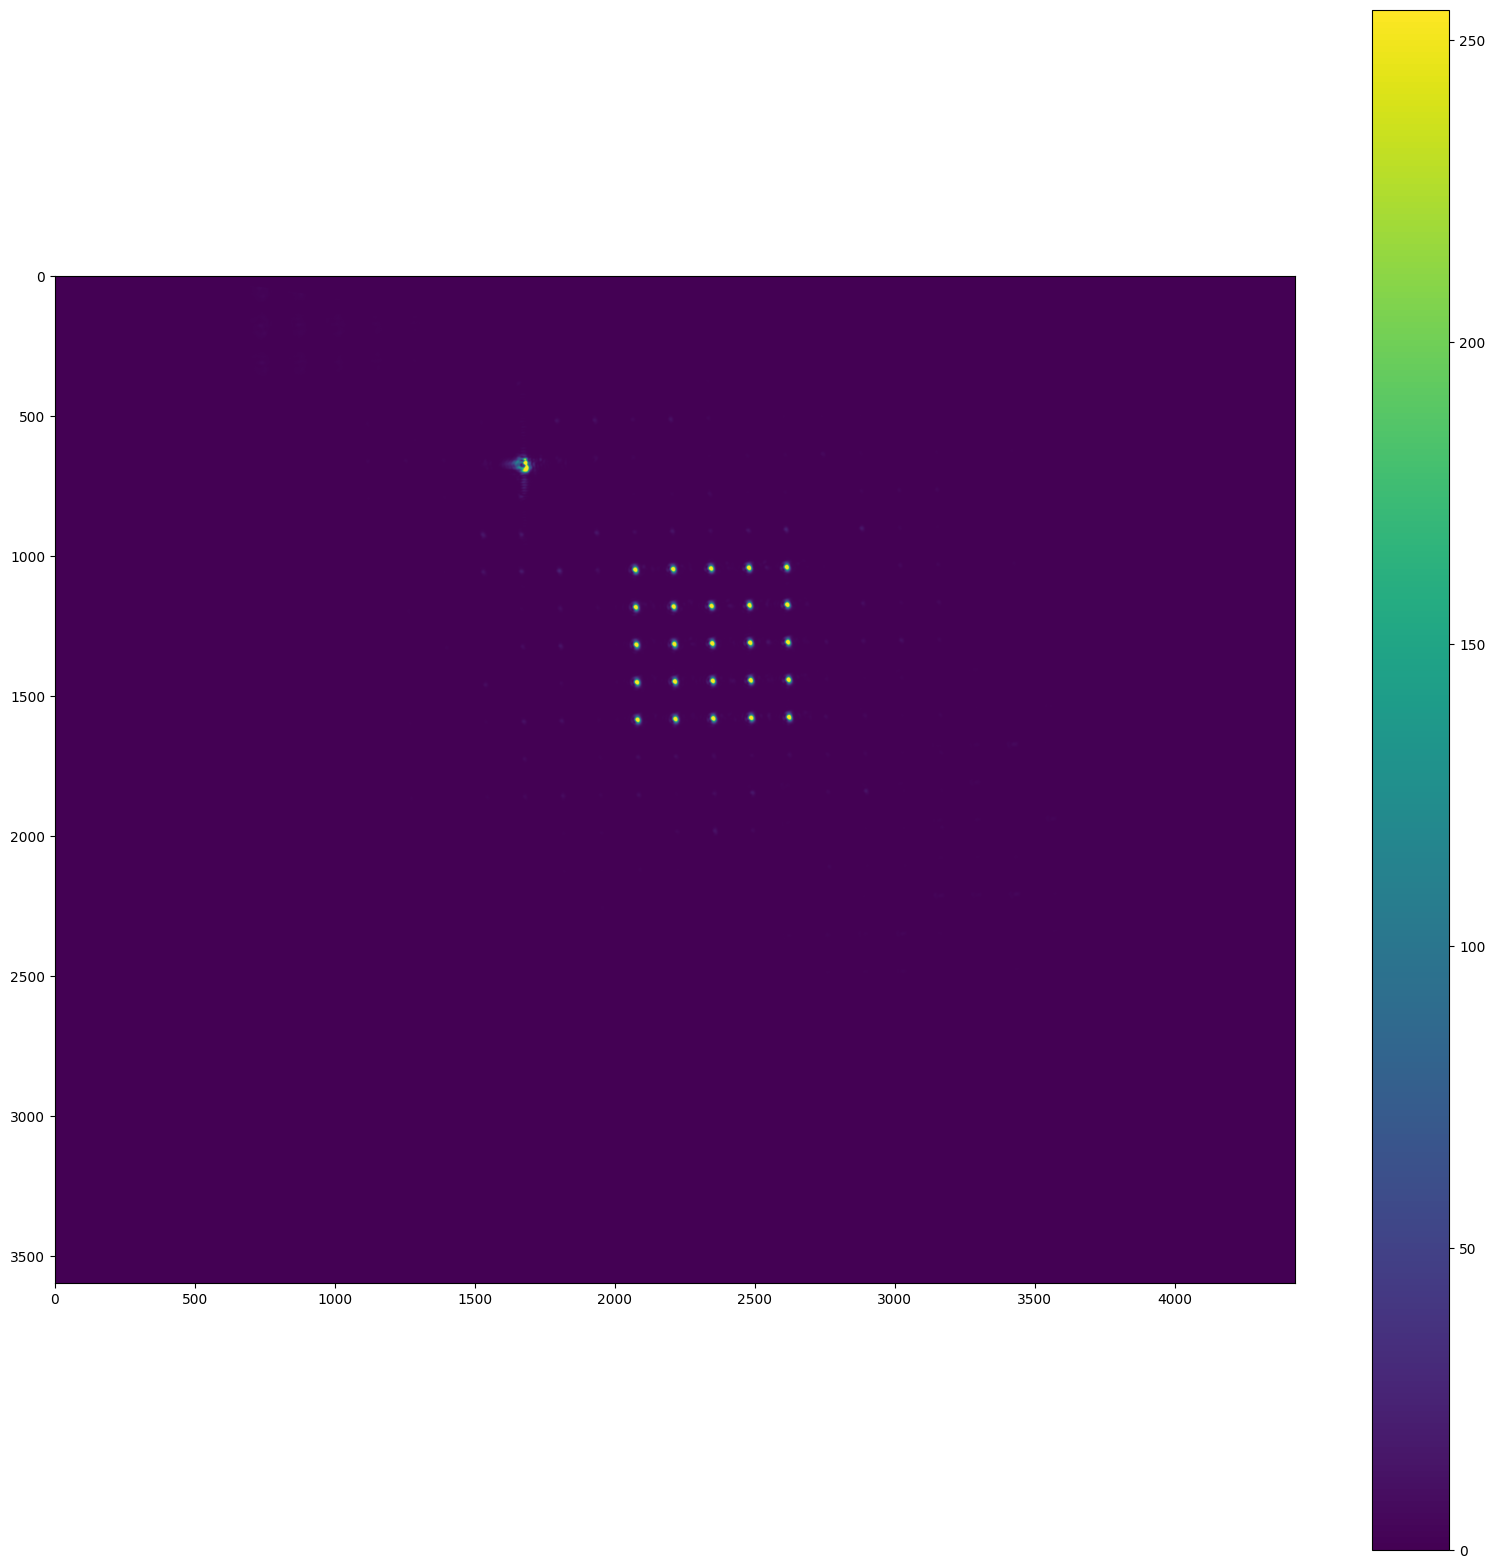

In [26]:

while True:

    if optimize:
        tophat_screen_Corrected=IMGpy.SLM_screen_Correct(SLM_screen)
        slm.updateArray(tophat_screen_Corrected)

    time.sleep(time_interval)

    #image = avt.get_image(etime)
    with Vimba() as vimba:
        camera_ids = vimba.camera_ids()
        print(camera_ids[0])
        cam =  vimba.camera(camera_ids[0])
        cam.open()
        cam.arm(mode='SingleFrame')

        # 设置曝光时间
        cam.ExposureTime = etime  # 新版属性直接赋值
        
        # 获取单帧
        frame = cam.acquire_frame()
        image = frame.buffer_data_numpy()

        cam.disarm()
      
    cutted_image = image
# rotated_image = rotate(cutted_image,angle=-4.8,reshape=False) 
    rotated_image_45 = rotate(image, angle=-8.5, reshape=True)
    flipped_image = np.flip(rotated_image_45)
    image_ROI = []
    intensity = []
    print(image_ROI)
    for i  in range(len(x1)):
        cur_roi = rotated_image_45[x1[i]:x2[i],y1[i]:y2[i]]
        image_ROI.append(cur_roi)
        # popt, pcov, fitted_image = gaussian_2d_fit(image_ROI[i], show=False)
        # intensity.append(popt[0])
        intensity.append(image_ROI[i].sum())


    intensity = np.array(intensity)
    # non_uniformity.append(intensity.std()/intensity.mean())
    # camera_intensity = camera_intensity_array_generate(intensity)
    camera_intensity = intensity.copy()
    intensity_data.append(camera_intensity)
    non_uniformity.append(camera_intensity.std()/camera_intensity.mean())
    print(camera_intensity.std()/camera_intensity.mean())
    plt.hist(x = intensity, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

    if camera_intensity.std()/camera_intensity.mean()< 0.004 or index == rep:
        break

    index += 1
    if index % 1 ==0:
        print('\n')
        print(index)


    if optimize:
        
        # camera_intensity_array = camera_intensity_array_generate(intensity)
        print(intensity)
        camera_intensity_array = intensity.copy()
        cameraAmp = SLM.camera_Amp_generate(targetAmp, camera_intensity_array) 

        
        targetAmp = SLM.target_adapt(targetAmp, cameraAmp)
        targetAmp_array=targetAmp[np.nonzero(targetAmp)]
        cameraAmp_array=cameraAmp[np.nonzero(cameraAmp)]
        print(targetAmp_array)
        print(cameraAmp_array)
        sum=np.multiply(targetAmp_array,cameraAmp_array)
        print(sum)


        targetAmp_data.append(targetAmp)

        print('Start the new SLM phase generation ...')
        plt.figure()
        plt.hist(x = intensity, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

        SLM_Phase = WGS.WGS_phase_generate(torch.from_numpy(SLM.initGaussianAmp), SLM_Phase, torch.from_numpy(targetAmp), Loop=20, threshold=0.01)
        SLM_screen=SLM.phase_to_screen(SLM_Phase.cpu().clone().numpy())
        slm_screen_f_corrected = SLM_screen 
      
        # SLM.target_and_phase_save(targetAmp, SLM_Phase.cpu().clone().numpy(), slm_screen_f_corrected, info = "stagger",
        #                         adapt_times='-sum-'+str(index))
       
plt.figure()
non_uniformity_show(non_uniformity)

plt.figure(figsize=(20,20))
plt.imshow(flipped_image)
plt.colorbar()
plt.show()



In [ ]:
slm.updateArray(tophat_screen_Corrected)

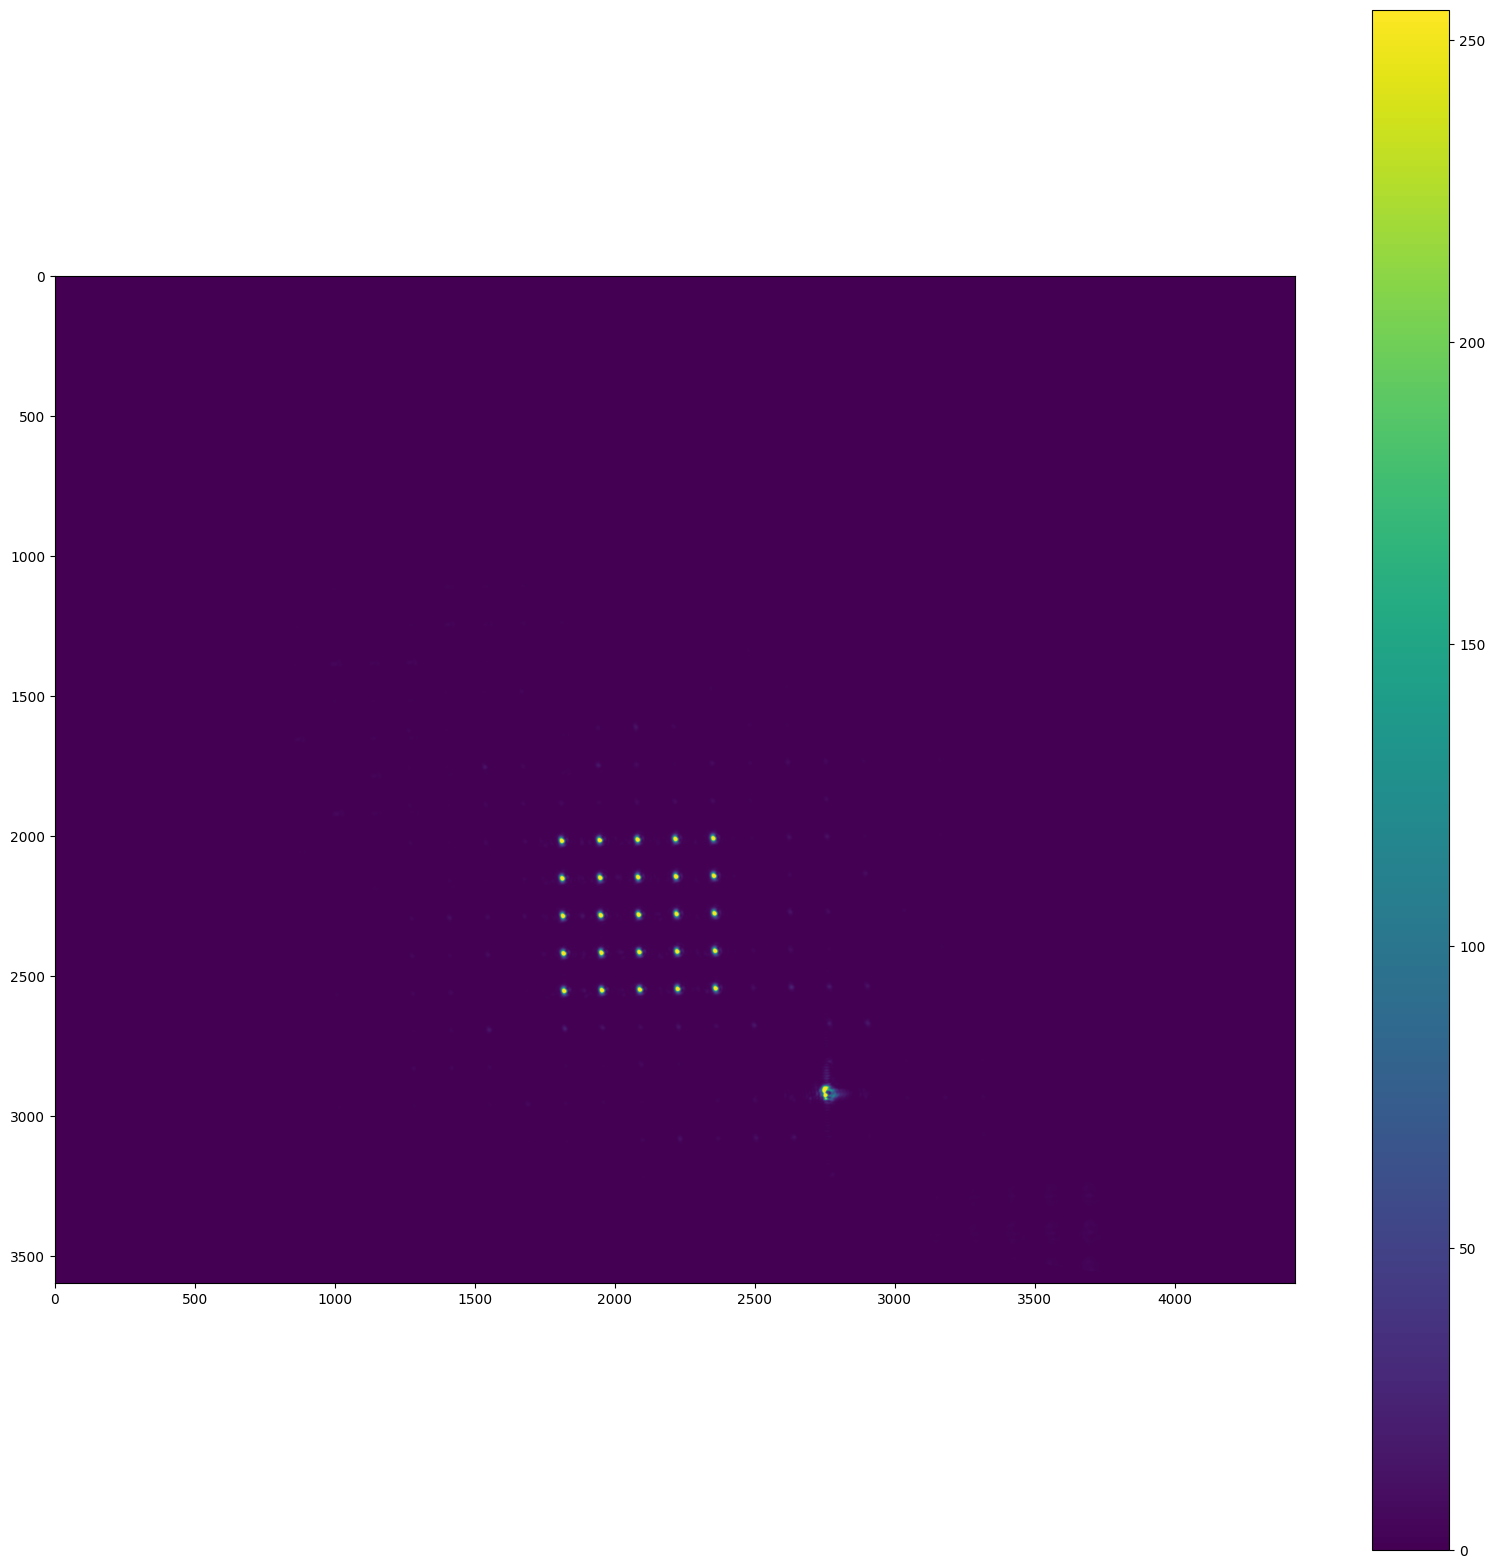

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(rotated_image_45)
plt.colorbar()
plt.show()

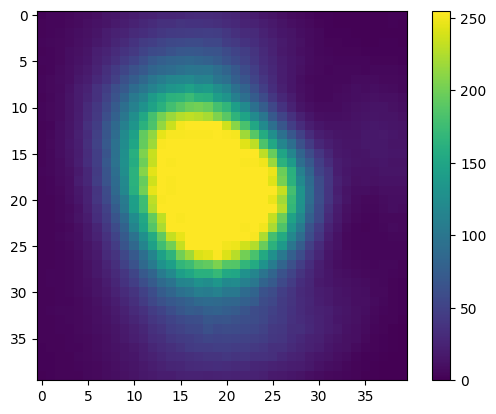

In [34]:
new_img = rotated_image_45[2000:2040,1790:1830]
plt.imshow(new_img)
plt.colorbar()
plt.show()

(array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 3., 5., 0., 1., 3., 3.,
        2., 1., 0., 1., 0., 0., 0., 1.]),
 array([104306.  , 104380.92, 104455.84, 104530.76, 104605.68, 104680.6 ,
        104755.52, 104830.44, 104905.36, 104980.28, 105055.2 , 105130.12,
        105205.04, 105279.96, 105354.88, 105429.8 , 105504.72, 105579.64,
        105654.56, 105729.48, 105804.4 , 105879.32, 105954.24, 106029.16,
        106104.08, 106179.  ]),
 <BarContainer object of 25 artists>)

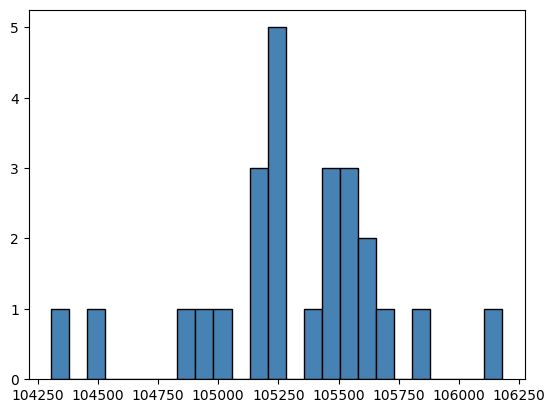

In [27]:
plt.figure()
plt.hist(x = intensity, # 指定绘图数据
bins = 25, # 指定直方图中条块的个数
color = 'steelblue', # 指定直方图的填充色
edgecolor = 'black', # 指定直方图的边框色
#range = (70000,105000)
)

In [ ]:
blinkslm=BlinkSLM()
blinkslm.write_image((SLM_screen).astype('uint8'))

Blink SDK did not construct successfully


AttributeError: 'BlinkSLM' object has no attribute 'height'

In [ ]:
print('max:',rotated_image[230:250,1540:1560].max())

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
blinkslm.slm_lib.Delete_SDK()


1

In [ ]:
# SLM.plot_target(targetAmp)
targetAmp_array=np.nonzero(targetAmp)
cameraAmp_array=np.nonzero(cameraAmp)
print(targetAmp.shape)
# print(targetAmp_array)
print(targetAmp[targetAmp_array])
print(cameraAmp[cameraAmp_array])

NameError: name 'targetAmp' is not defined

## slm gen center of array

Focal pixelpitch: [0.1468305124227713, 0.1468305124227713]
The input gaussian light beam waist: 6000um
The init gaussian phase is random generated.
focal pixelpitch: [0.1468305124227713, 0.1468305124227713]
array spacing: [7.5, 7.5]
spacing pixels: [51, 51]
arraysize: (1, 1)


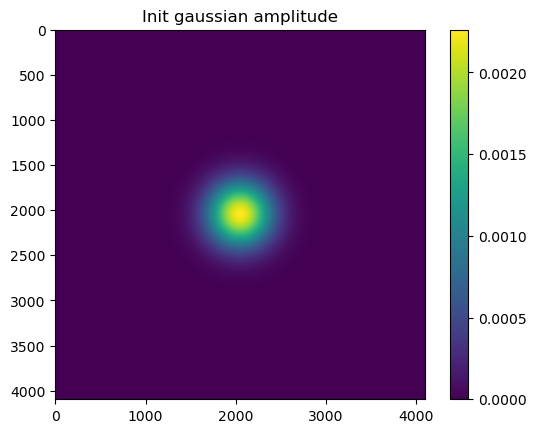

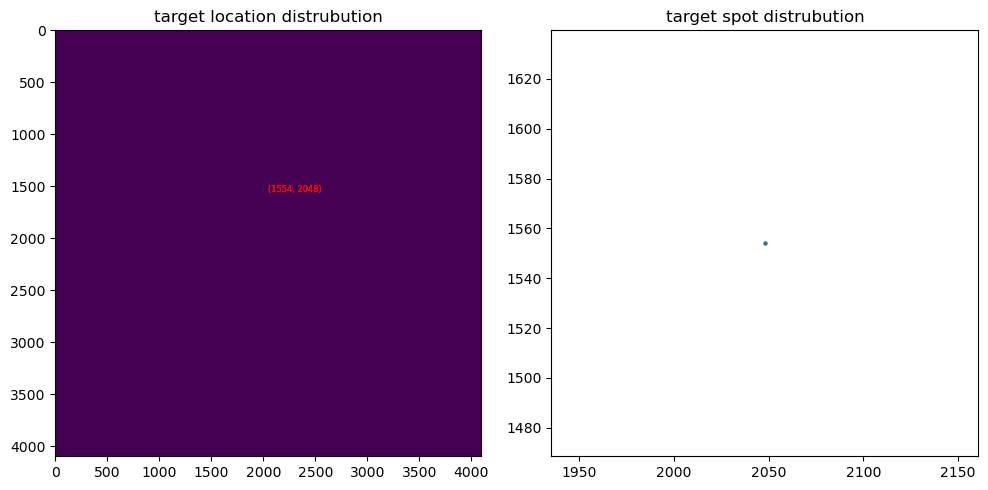

You have generated the target with (72.5, 0)um distance relative to the center.


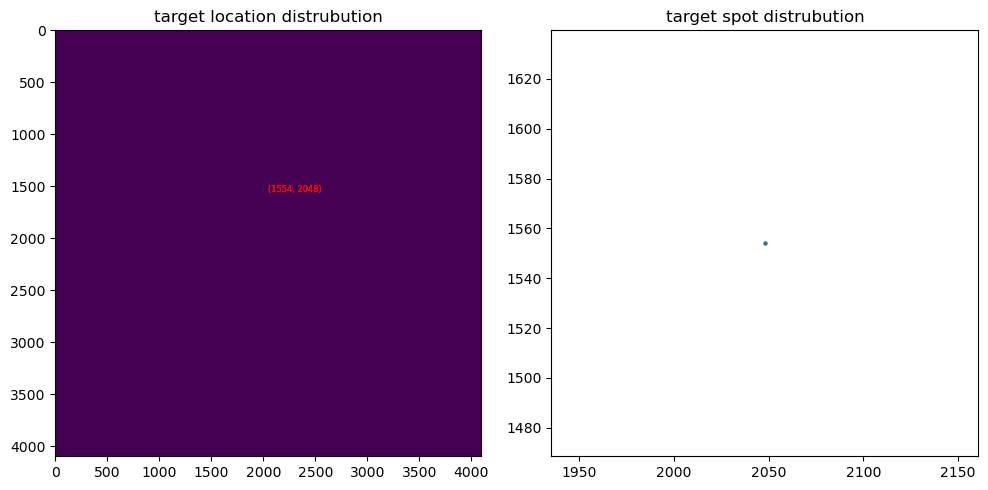

You have rotated the target by angle 0.


C:\Users\Demeter\AppData\Local\Temp\ipykernel_19300\4205118359.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  single_SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(singleAmp), Loop=20, threshold=0.01, Plot=True)
c:\Users\Demeter\Desktop\slm code - 副本\WGS.py:94: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


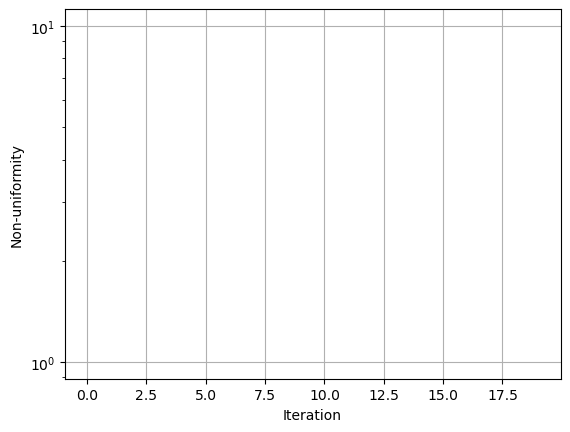

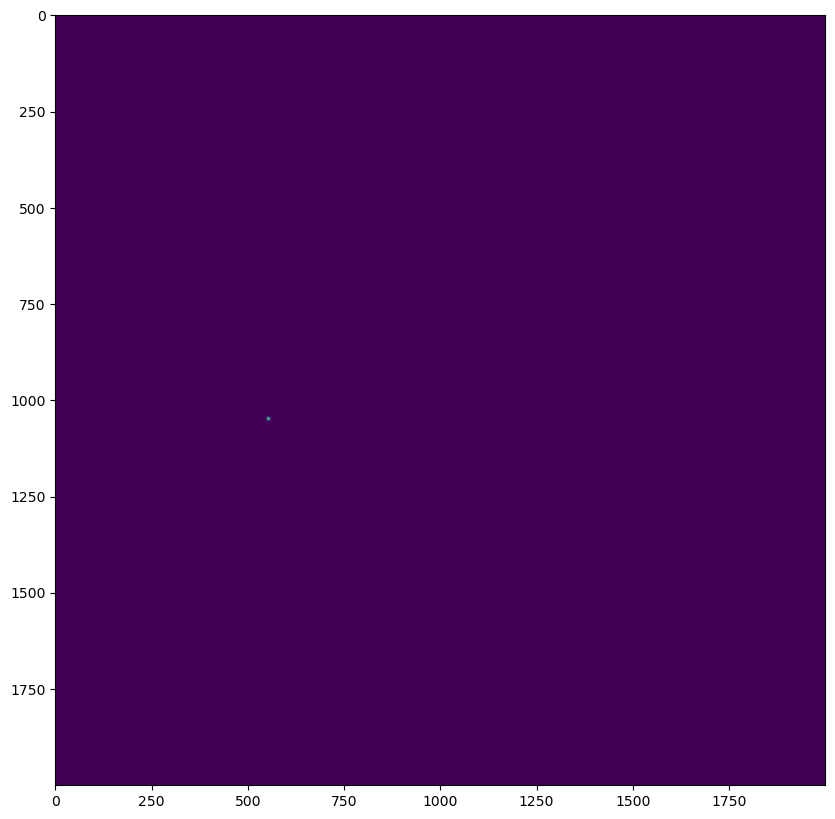

In [ ]:

singleSLM = SLM_class()

singleSLM.image_init()
center_dis = (20+7*7.5, 0)
# center_dis = (80, 0)
input_shape = (4096, 4096) 
RandomPhase = torch.rand(input_shape, dtype=torch.float32) * 2 * np.pi - np.pi
singleAmp=singleSLM.target_generate(Lattice_type, distance=center_dis, arraysize=(1, 1),  Plot = True)

singleAmp_array=np.nonzero(singleAmp)


single_SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(singleAmp), Loop=20, threshold=0.01, Plot=True)
single_SLM_screen=singleSLM.phase_to_screen(single_SLM_Phase.cpu().clone().numpy())


single_SLM_screen=singleSLM.phase_to_screen(single_SLM_Phase.cpu().clone().numpy())
single_fftAmp,single_fftPhase = singleSLM.phase_to_fftField(single_SLM_Phase.cpu())
plt.figure(figsize=(10,10))       

plt.imshow(single_fftAmp[1000:3000,1000:3000])
plt.show()


## apply center phase to slm

In [ ]:
blinkslm.slm_lib.Delete_SDK()
blinkslm=BlinkSLM()
# slm_phase=SLM.zernike_generate()
blinkslm.write_image((single_SLM_screen).astype('uint8'))

Blink SDK was successfully constructed
Found 1 SLM controller(s)


406 -607

(1216, 1936)


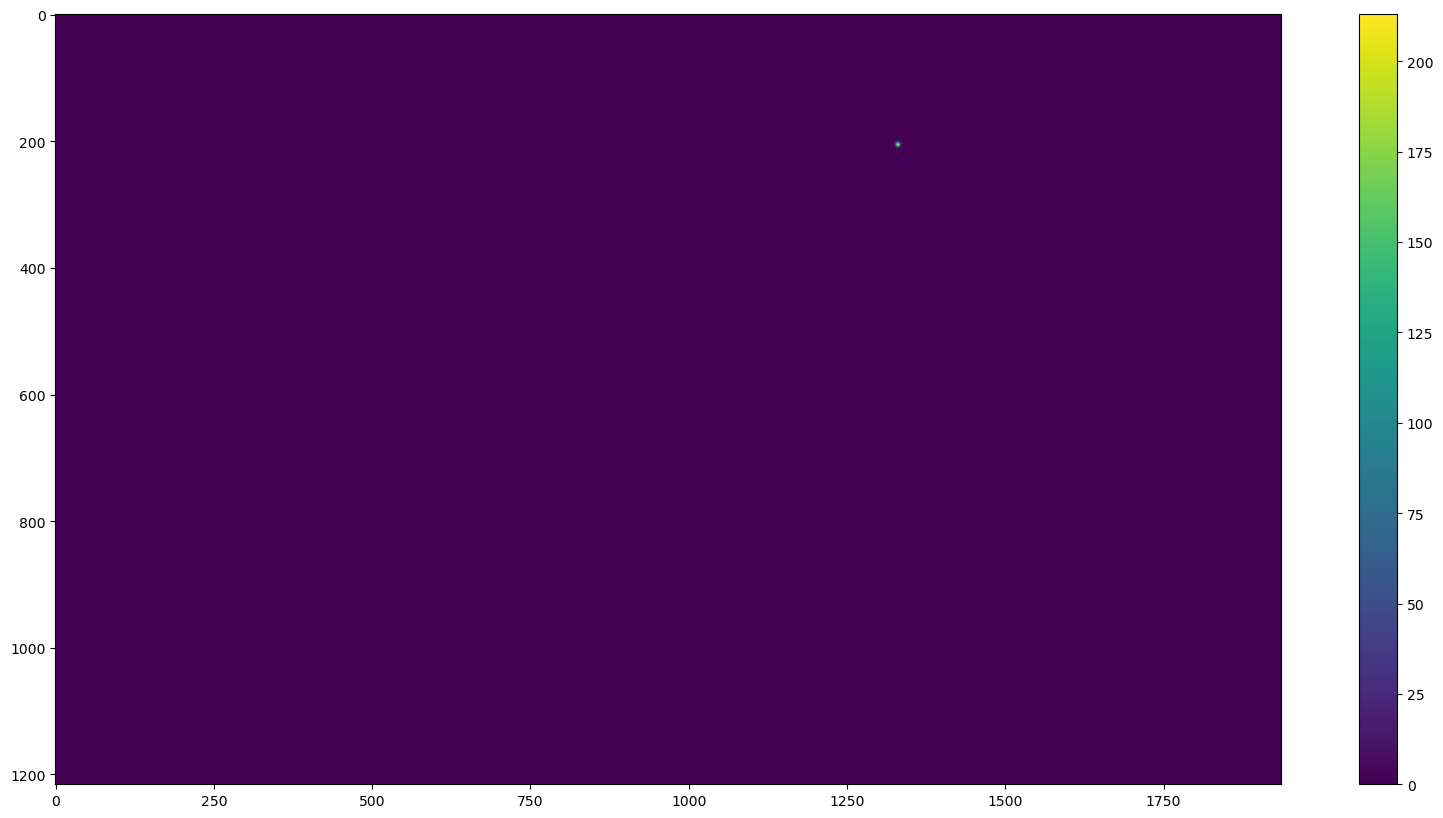

max: 213


In [ ]:

frame = []
# def setup_camera(cam: Camera):
#     with cam:
#         # Try to adjust GeV packet size. This Feature is only available for GigE - Cameras.
#         try:
            
#             cam.exposuretime=etime
#             print(cam.exposuretime)

#         except (AttributeError, VimbaFeatureError):
#             pass
#         try:
#             cam.GVSPAdjustPacketSize.run()

#             while not cam.GVSPAdjustPacketSize.is_done():
#                 pass

#         except (AttributeError, VimbaFeatureError):
#             pass

image = avt.get_image(64)
print(image.shape)

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.colorbar()
plt.show()
print('max:',image.max())

## blink left right

### calculate phase

Focal pixelpitch: [0.1468305124227713, 0.1468305124227713]
The input gaussian light beam waist: 6000um
The init gaussian phase is random generated.
focal pixelpitch: [0.1468305124227713, 0.1468305124227713]
array spacing: [7.5, 7.5]
spacing pixels: [51, 51]
arraysize: (1, 1)


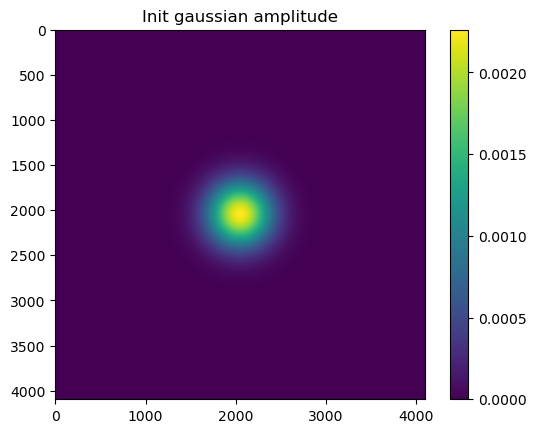

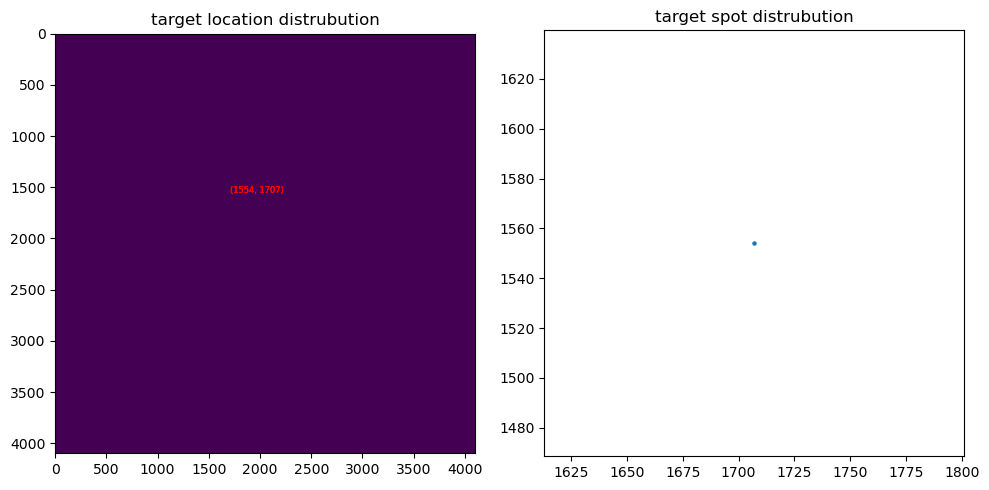

You have generated the target with (72.5, 50)um distance relative to the center.


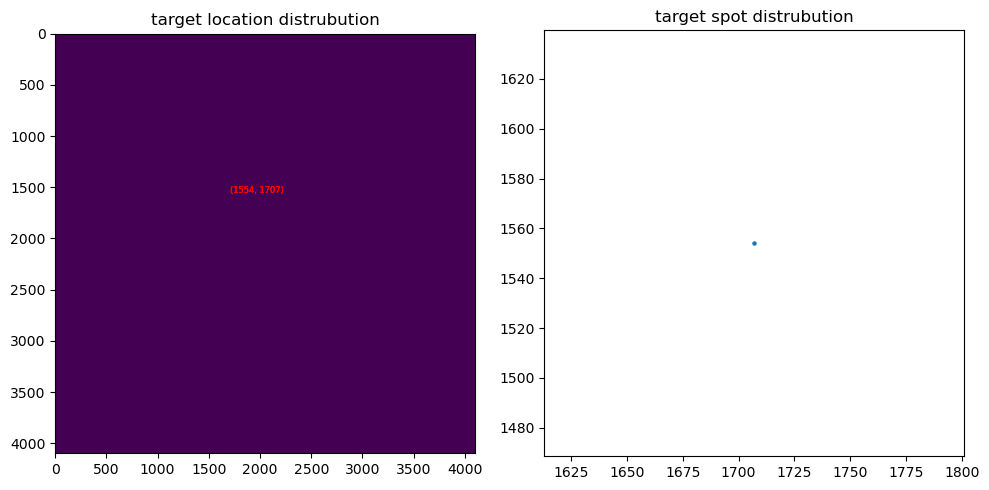

You have rotated the target by angle 0.


C:\Users\Demeter\AppData\Local\Temp\ipykernel_19300\3015288014.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(upperAmp), Loop=2, threshold=0.01, Plot=True)


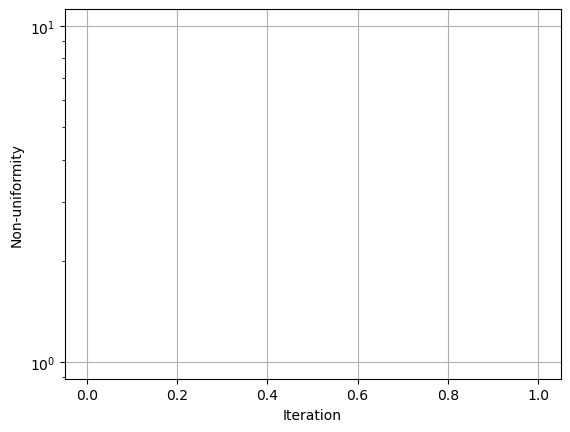

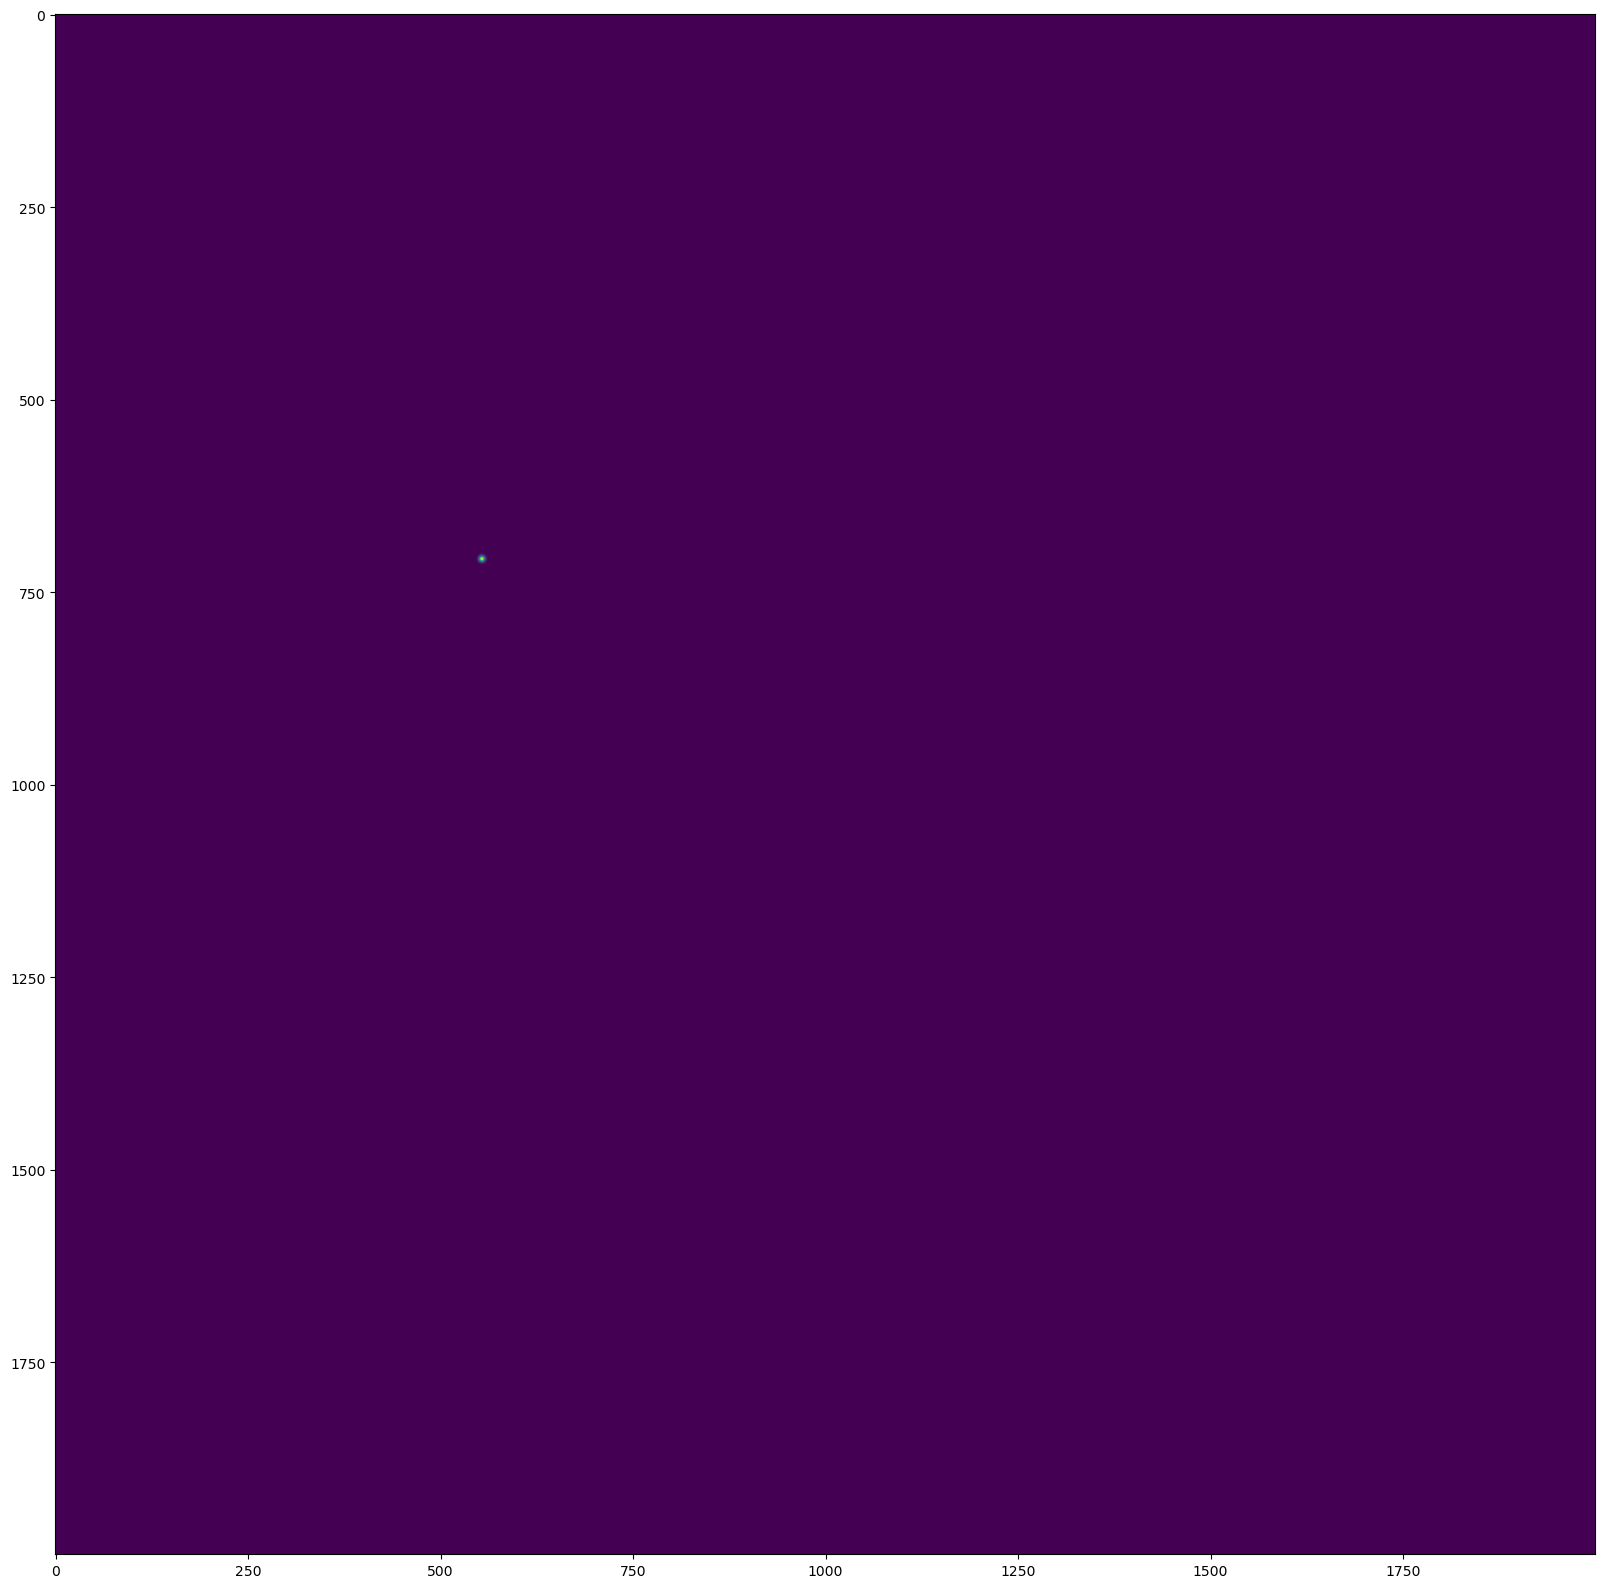

Focal pixelpitch: [0.1468305124227713, 0.1468305124227713]
The input gaussian light beam waist: 6000um
The init gaussian phase is random generated.
focal pixelpitch: [0.1468305124227713, 0.1468305124227713]
array spacing: [7.5, 7.5]
spacing pixels: [51, 51]
arraysize: (1, 1)


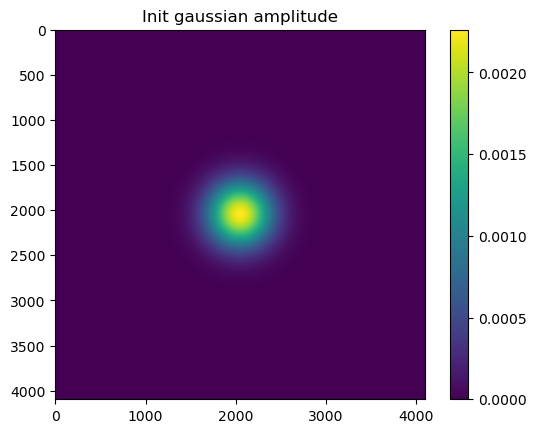

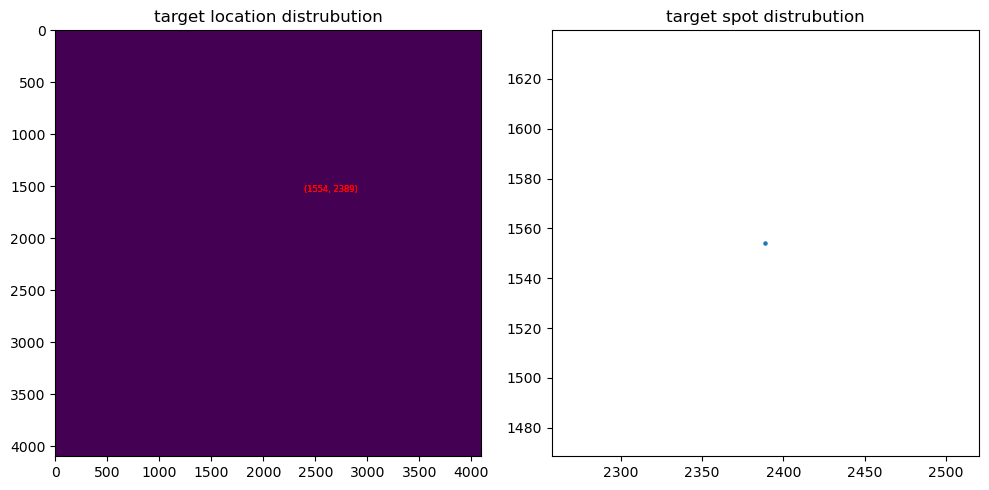

You have generated the target with (72.5, -50)um distance relative to the center.


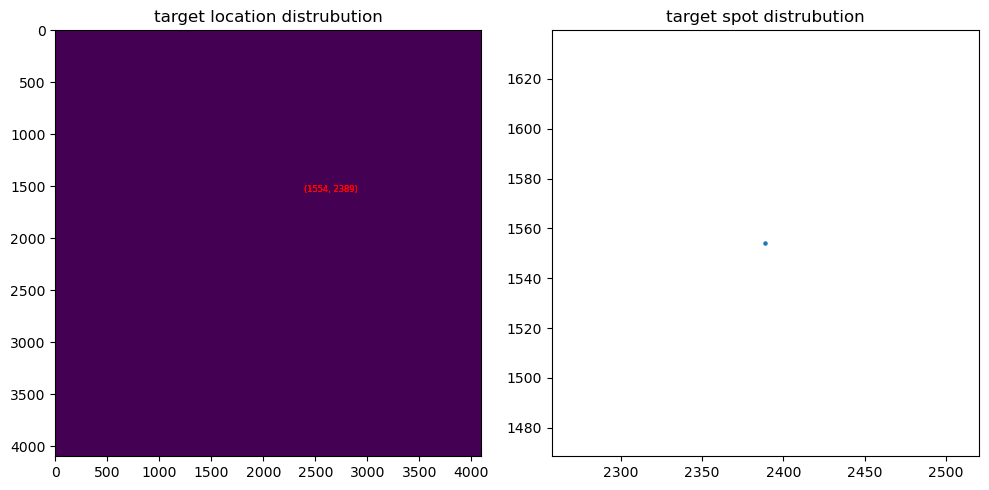

You have rotated the target by angle 0.


C:\Users\Demeter\AppData\Local\Temp\ipykernel_19300\3015288014.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lower_SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(lowerAmp), Loop=2, threshold=0.01, Plot=True)


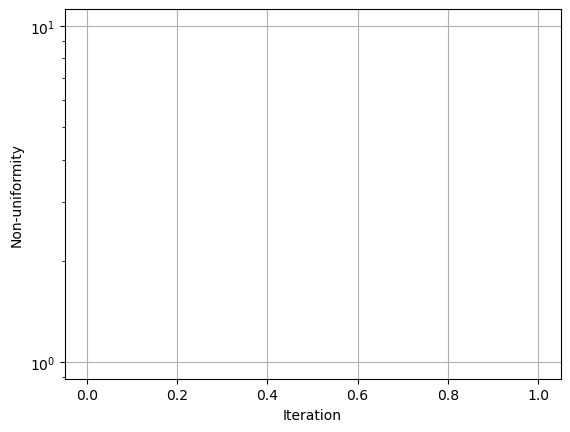

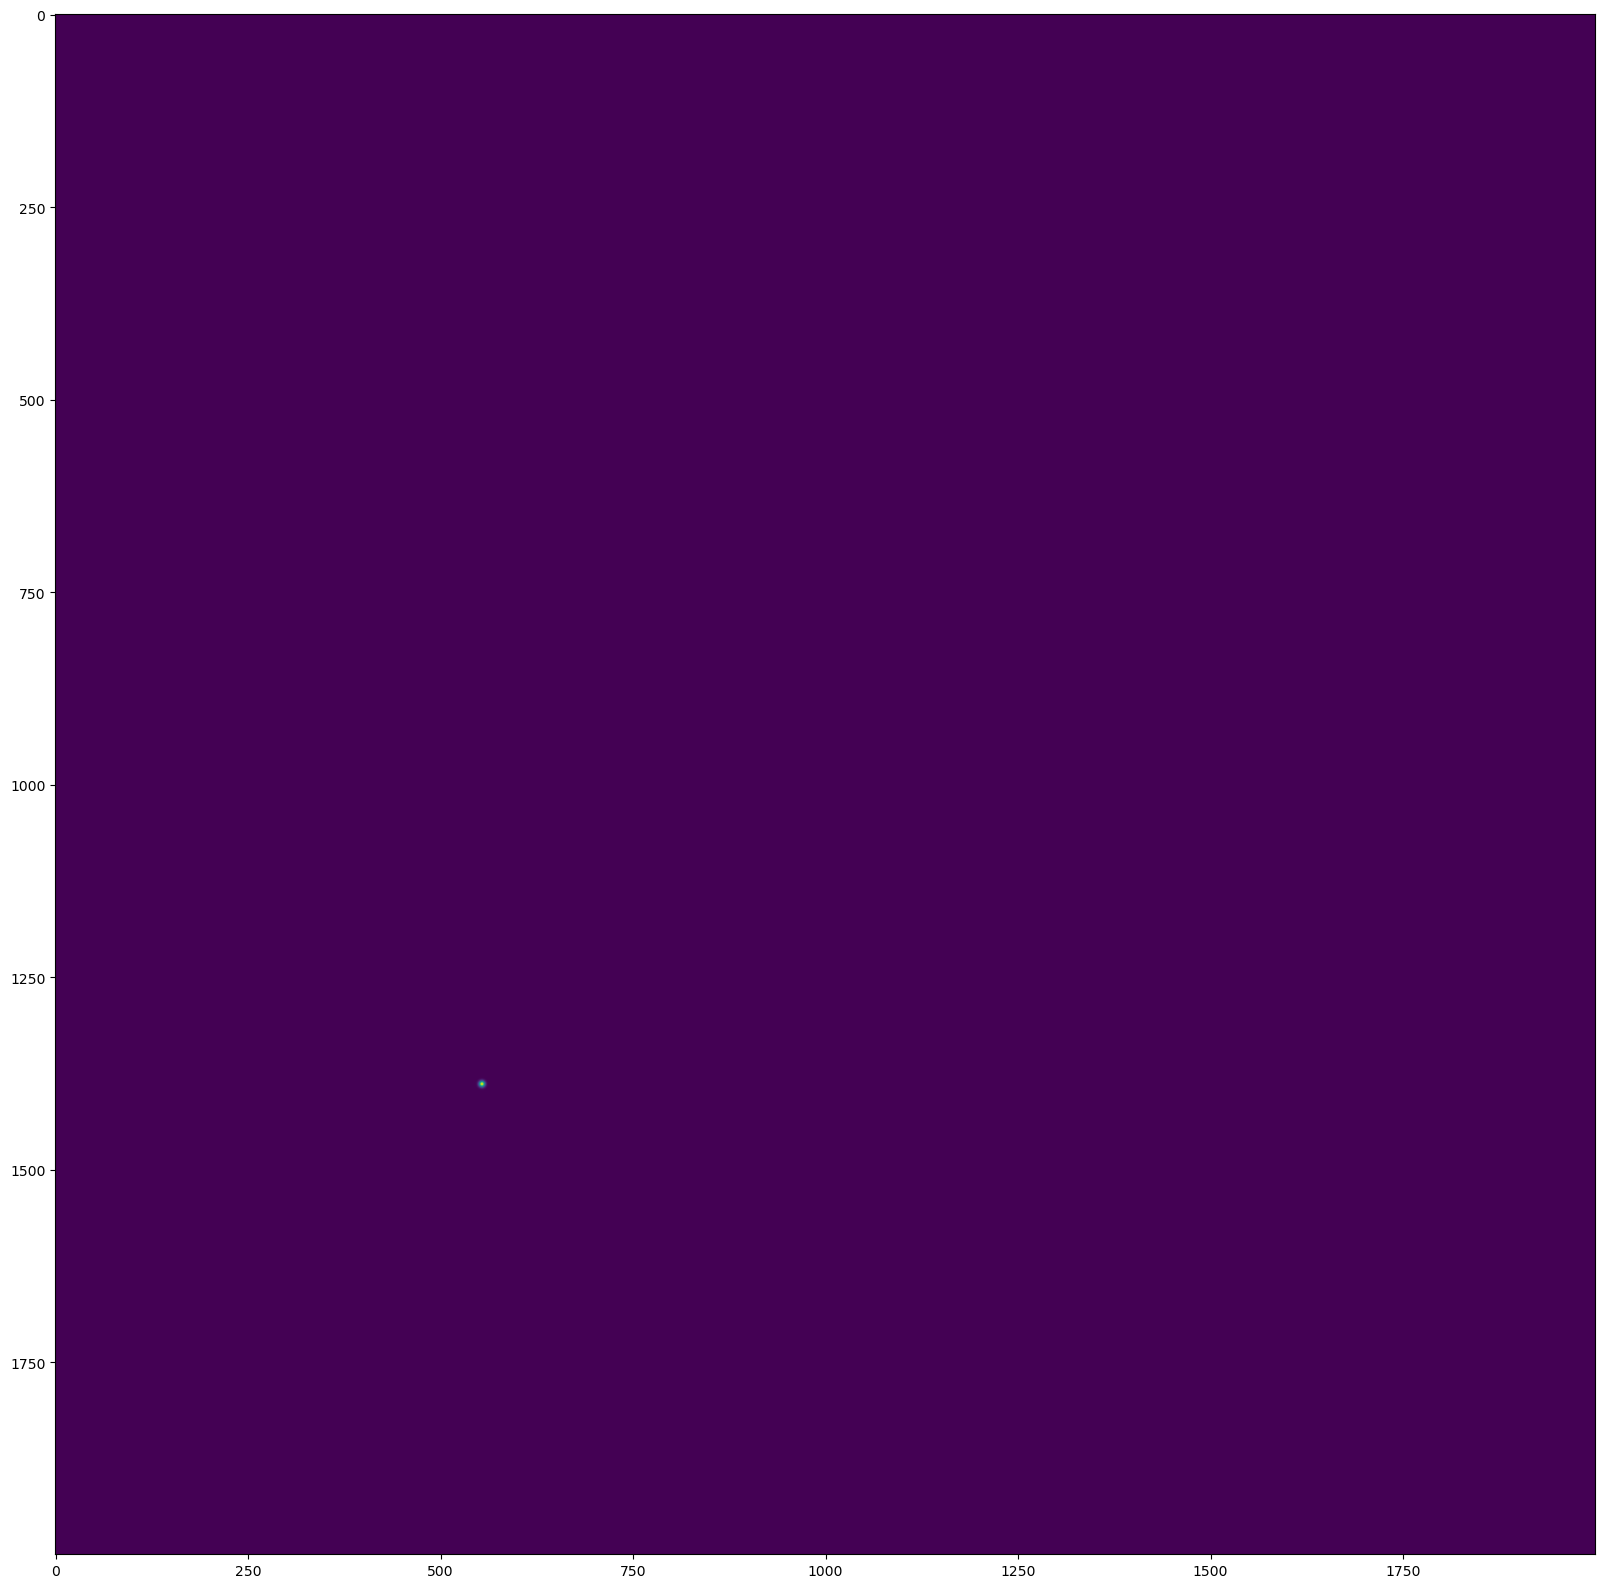

In [ ]:
center_dis = (20+7*7.5, 0)
upperSLM = SLM_class()

upperSLM.image_init()
upperAmp=upperSLM.target_generate(Lattice_type, distance=(20+7*7.5,50), arraysize=(1, 1),  Plot = True)


upperAmp_array=np.nonzero(upperAmp)


upper_SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(upperAmp), Loop=2, threshold=0.01, Plot=True)
upper_SLM_screen=upperSLM.phase_to_screen(upper_SLM_Phase.cpu().clone().numpy())


upper_SLM_screen=upperSLM.phase_to_screen(upper_SLM_Phase.cpu().clone().numpy())
upper_fftAmp,upper_fftPhase = upperSLM.phase_to_fftField(upper_SLM_Phase.cpu())
plt.figure(figsize=(20,20))
plt.imshow(upper_fftAmp[1000:3000,1000:3000])
plt.show()

lowerSLM = SLM_class()

lowerSLM.image_init()
lowerAmp=lowerSLM.target_generate(Lattice_type, distance=(20+7*7.5, -50), arraysize=(1, 1),  Plot = True)


lowerAmp_array=np.nonzero(lowerAmp)


lower_SLM_Phase=WGS.WGS_phase_generate(torch.tensor(initSLMAmp), torch.tensor(RandomPhase), torch.from_numpy(lowerAmp), Loop=2, threshold=0.01, Plot=True)
lower_SLM_screen=lowerSLM.phase_to_screen(lower_SLM_Phase.cpu().clone().numpy())


lower_SLM_screen=lowerSLM.phase_to_screen(lower_SLM_Phase.cpu().clone().numpy())
lower_fftAmp,lower_fftPhase = lowerSLM.phase_to_fftField(lower_SLM_Phase.cpu())
plt.figure(figsize=(20,20))
plt.imshow(lower_fftAmp[1000:3000,1000:3000])
plt.show()

## apply to slm

In [ ]:
import time
print(upper_SLM_screen)
print(lower_SLM_screen)
while True:
    blinkslm.slm_lib.Delete_SDK()
    blinkslm=BlinkSLM()
    blinkslm.write_image((upper_SLM_screen).astype('uint8'))
    time.sleep(1)
    blinkslm.slm_lib.Delete_SDK()
    blinkslm=BlinkSLM()
    blinkslm.write_image((lower_SLM_screen).astype('uint8'))
    time.sleep(1)

[[ 54  23 247 ...  19 243 212]
 [ 33   2 226 ... 252 222 191]
 [ 11 236 205 ... 231 201 170]
 ...
 [ 54  23 247 ...  19 243 212]
 [ 33   2 226 ... 252 222 191]
 [ 11 236 205 ... 231 200 170]]
[[198 167 137 ... 163 132 101]
 [219 189 158 ... 184 153 123]
 [241 210 179 ... 205 175 144]
 ...
 [198 168 137 ... 163 132 102]
 [219 189 158 ... 184 153 123]
 [241 210 179 ... 205 175 144]]
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully constructed
Found 1 SLM controller(s)
Blink SDK was successfully cons

KeyboardInterrupt: 

voltex phase

Blink SDK was successfully constructed
Found 1 SLM controller(s)


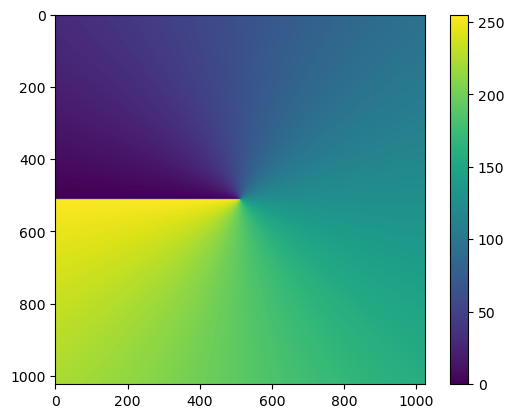

In [ ]:
import time
N, M = (1024,1024)
xx, yy = np.meshgrid(np.arange(-M//2,M//2),np.arange(-N//2,N//2))
phase1 = np.arctan2(yy,xx)
phase1 = ((phase1 + np.pi)/(2*np.pi)*255).astype('uint8')

phase2 = np.arctan2(yy,xx)[::-1,::-1]
phase2 = ((phase1 + np.pi)/(2*np.pi)*255).astype("uint8")

phase = np.copy(phase1)
# phase[512-30:512+31,512-30:512+31] = phase2[512-30:512+31,512-30:512+31]

plt.imshow(phase)
plt.colorbar()
blinkslm.slm_lib.Delete_SDK()
blinkslm=BlinkSLM()
blinkslm.write_image(phase)


Blink SDK was successfully constructed
Found 1 SLM controller(s)


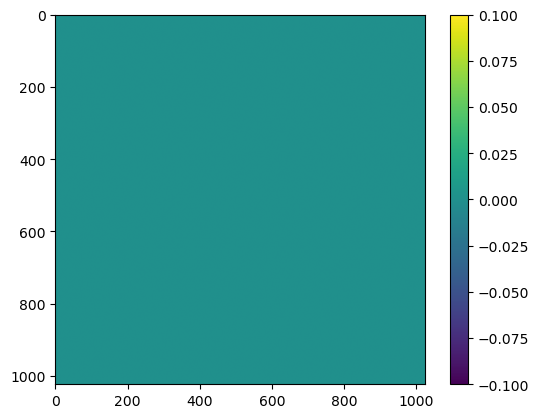

In [ ]:
import time
N, M = (1024,1024)
xx, yy = np.meshgrid(np.arange(-M//2,M//2),np.arange(-N//2,N//2))
zero_phase = np.zeros((N,M))

plt.imshow(zero_phase)
plt.colorbar()
blinkslm.slm_lib.Delete_SDK()
blinkslm=BlinkSLM()
blinkslm.write_image(zero_phase)


In [ ]:
blinkslm.slm_lib.Delete_SDK()


1

In [ ]:
blinkslm=BlinkSLM()
blinkslm.write_image((SLM_screen).astype('uint8'))

Blink SDK was successfully constructed
Found 1 SLM controller(s)


NameError: name 'SLM_screen' is not defined